<a href="https://colab.research.google.com/github/rafael-albuquerque-oliveira/analise-inadimplencia/blob/main/inadimplencia_nubank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Avalição de Risco de Inadimplência Nubank**

Um dos indicadores que causam mais problemas para bancos, financiadoras e empresários é a taxa de inadimplência por parte da sua carteira de clientes.

Avaliar se uma pessoa irá deixar de cumprir com suas obrigações financeiras é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de default.

Default é o termo utilizado para indicar o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é a própria incapacidade do cliente de pagar a dívida, por limitações financeiras, algo que só tem agravado com a crise dos últimos anos.

Grandes bancos e Fintechs têm apostado cada vez mais em modelos de Machine Learning para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o Nubank é uma das que mais tem se destacado no uso de Inteligência Artificial e times de Data Science.

O conjunto de dados a ser utilizado neste Projeto de Data Science parte de uma competição realizada pela Startup Nubank a fim de revelar talentos e potenciais contratações pela Fintech.

## **Contextualização do Problema**

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não cumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).

>OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente se tornar inadimplente.

Espera-se um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.

## **1. Importação das Bibliotecas Necessárias**

In [ ]:
# Importação das bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Definir o estilo de plotagem do seaborn
sns.set_style()

# Para filtrar as mensagens de aviso
import warnings
warnings.filterwarnings('ignore')

## **2. Importação da Base de Dados**

Os dados utilizados estão disponíveis neste [link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). O dataset consiste em um conjunto de dados em csv com 45 mil linhas e 43 features.

In [ ]:
# Importação da base de dados para um dataframe
df = pd.read_csv('http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0')

# Para visualizar as primeiras 5 linhas do dataframe
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


## **3. Análise Exploratória dos Dados**

Em um primeiro momento é importante entender o dataset e as suas dimensões, para podermos visualizar como é o formato original e a estrutura dos dados.

Para verificar o formato do dataframe, é utilizado o '.shape()'. No entanto, para uma visualização melhor, podemos fazer o seguinte:

In [ ]:
# Formato do dataframe
print('Formato do dataframe:')
print(f'Linhas:  {df.shape[0]}')
print(f'Colunas: {df.shape[1]}')

Formato do dataframe:
Linhas:  45000
Colunas: 43


Já para termos uma ideia da estrutura geral, com nomes das colunas e exemplos de linhas, podemos usar o '.head()', que mostra as primeiras 5 linhas ou para visualizar as últimas 5 linhas, o '.tail()'.

In [ ]:
# Visualizar as primeiras 5 linhas
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [ ]:
# Visualizar as últimas 5 linhas
df.tail()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
44995,696cb747-1159-0a29-6731-8c52c6c42f5d,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,280.0,96.379531,0.416693,103.667082,0.17,14766.42,36.0,10627.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100013.24,False,x6Gw/1I8t3KPgT6s82Kodg==,Hfh28TzqkRno6rOU/tjy6Q==,NCqL3QBx0pscDnx3ixKwXg==,NaN,N5/CE7lSkAfB04hVFFwllw==,37.0,0.0,0.0,7.0,7.0,13:27:39,72,hotmail.com,0.0,2,1.0,7.0,ornilza,730,"(-22.486891256430695, -44.909010639017616)",Facebook,768-5074915,73417.0,BR-GO,52148,"{'tags': ['n1', 'n7', 'n4', 'n0']}",Mozilla/5.0 (Linux; Android 6.0.1; SM-G920V Bu...,NaN
44996,92cd9b1a-9a8e-43ad-5d96-8e999128b472,False,smzX0nxh5QlePvtVf6EAeg==,vJyc9xom9v7hwFMPTIpmKw==,370.0,96.124977,0.692196,97.977973,0.27,NaN,NaN,36262.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,95026.69,False,bwNrC22VlFOFk6/nEHQc6A==,vYKZVZfAwOMRjE0QGAYvbA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,16.0,16.0,22:50:49,51,gmail.com,NaN,1,NaN,1.0,deisilu,28,"(-12.881449687799003, -46.43545330884514)",Waiting-list,772-3517810,26246.0,BR-RO,46084,"{'tags': ['n11', 'n5', 'n12']}",Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,NaN
44997,febdd174-cf18-0be1-feb8-38399dd67d9e,False,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,280.0,102.377780,0.530938,93.687747,0.30,NaN,NaN,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,106020.90,NaN,xsd3ZdsI3356I3xMxZeiqQ==,Kihc6OKBTIHsGwCQy2Vruw==,NCqL3QBx0pscDnx3ixKwXg==,NaN,nSpvDsIsslUaX6GE6m6eQA==,7.0,0.0,0.0,6.0,6.0,09:60:49,476,gmail.com,NaN,2,1.0,27.0,elayne,940,"(-23.888982131800983, -50.645313285616645)",Waiting-list,334-9885724,101252.0,BR-SP,30570,"{'tags': ['dfa', 'c55', 'pro+aty']}",Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,NaN
44998,a0a5a872-6165-b939-b711-37d045a0b5a8,True,smzX0nxh5QlePvtVf6EAeg==,6J1ZMTzN5GKHXnhM4J1JbA==,240.0,100.476090,0.214697,86.759074,0.37,NaN,NaN,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,185018.07,True,xsd3ZdsI3356I3xMxZeiqQ==,Kihc6OKBTIHsGwCQy2Vruw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,53.0,0.0,0.0,10.0,10.0,02:18:51,35,gmail.com,0.0,0,1.0,2.0,hidelburgo,459,"(-5.14769885524928, -37.98386842511541)",Instagram,238-9568414,129844.0,BR-SP,12742,"{'tags': ['n9', 'n2']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
44999,a7504e93-123a-f965-70c6-ab01a0d475f7,False,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,530.0,101.095813,0.011369,97.362918,0.31,4226.74,36.0,17942.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,34013.65,NaN,BB/zpwTH+8GCIVHlhzOU1Q==,8fTg1YyyuslJ5OATAWj5Ww==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,10.0,15:01:57,414,hotmail.com,0.0,1,NaN,45.0,genny,781,"(-23.13900985246712, -52.29465769715389)",Facebook,296-8101743,112766.0,BR-MT,41693,"{'tags': ['dfa', 'c55', 'pro+aty', 'n8', 'n4']}",Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,NaN



Algumas conclusões iniciais que podem ser destacadas a respeito desta análise inicial:

* Existe uma coluna id, anônima, que representa um identificador único do cliente. Iremos eliminar esta coluna mais para frente, pois ela não contém nenhuma informação relevante.
* A variável alvo para analisar o risco de default (inadimplência) está na coluna target_default.
* As colunas ['score_3', 'score_4', 'score_5'] são numéricas e as colunas ['score_1', 'score_2'] estão codificadas de alguma maneira. Teremos que verificar mais para a frente se existe uma quantidade de classes que possa ser convertida em informação útil.
* existem outras variáveis que apresentam algum tipo de codificação, como ['reason', 'state', 'zip', 'channel', 'job_name', 'real_state'] que estão codificadas e também precisarão de alguma análise mais profunda para sabermos se é possível extrair alguma informação das mesmas.
* A coluna profile_tags contém um dicionário com tags atribuídas a cada cliente, aparentemente.
* A coluna target_fraud seria a variável alvo de outro modelo para este mesmo dataset, onde o objetivo seria a detecção de fraude.
* A coluna lat_lon está em formato string contendo uma tupla com as coordenadas.

Em um primeiro momento, podemos visualizar os nomes e os tipos das features, ou colunas, do dataframe:

In [ ]:
df.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

Podemos também ver um resumo estatístico do dataframe com a fução '.describe()'.

In [ ]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000



Olhando o resumo das principais informações estatísticas somos capazes de destacar algumas observações:

* A coluna external_data_provider_credit_checks_last_2_year possui valores mínimos, máximos e desvio-padrão iguais a zero.
* A coluna reported_income apresenta valores inf, que irão interferir na análise e modelo. Substituiremos valores do tipo np.inf por np.nan para trabalhar com os dados.
* A coluna external_data_provider_email_seen_before apresenta o valor mínimo de -999, o que é estranho ao se considerar as outras informações. Após verificar de maneira mais aprofundada, chegou-se a conclusão que esse dados são outliers ou foram tratados inadequadamente. Substituiremos os valores iguais a -999 por np.nan.

Outro ponto importante é saber a quantidade de dados inexistentes por coluna. É possível ver o número de dados ausentes com 'isnull()'. Mas uma outra forma de ver é buscar o porcentual desses dados por feature.

In [ ]:
# Percentual de dados ausentes por feature
print('\n Percentual de Valores Ausentes')
print((df.isnull().sum() / df.shape[0]).sort_values(ascending = False)*100)


 Percentual de Valores Ausentes
target_fraud                                        96.617778
last_amount_borrowed                                66.568889
last_borrowed_in_months                             66.568889
ok_since                                            58.988889
external_data_provider_credit_checks_last_2_year    50.284444
external_data_provider_credit_checks_last_year      33.608889
credit_limit                                        30.666667
n_issues                                            25.653333
facebook_profile                                     9.906667
marketing_channel                                    7.951111
job_name                                             7.413333
target_default                                       7.242222
external_data_provider_email_seen_before             4.962222
lat_lon                                              3.028889
user_agent                                           1.604444
n_bankruptcies                       

* Como podemos notar em relação ao percentual de valores ausentes neste dataframe, algumas colunas possuem mais de 50% de dados faltantes, como é o caso das features ['target_fraud', 'last_amount_borrowed', 'last_borrowed_in_months', 'ok_since', 'external_data_provider_credit_checks_last_2_year'];
* Outras, como ['external_data_provider_credit_checks_last_year', 'credit_limit', 'n_issues'] possuem entre 25 e 34% faltantes;
* Já a nossa feature alvo 'target_default' possui aproximadamente 7% dos valores faltantes, no entanto, estes serão eliminados do dataframe.

Para esta análise, o caso com maior percentual de valores faltantes 'target_fraud' não representa em si um problema, visto que não é uma feature de interesse neste momento. Já as demais necessitam de cuidado adicional.

Outra informação interessante de ser tirada é a contagem de valores únicos por feature, uma vez que valores numéricos podem indicar classes ou categorias que representam uma feature, ou também uma quantidade de classes para variáveis categóricas.

In [ ]:
# Valores únicos
print('\nValores Únicos:')
print(df.nunique().sort_values())


Valores Únicos:
external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               

Esta contagem indica que as features 'external_data_provider_credit_checks_last_2_year' e 'channel' possuem um único valor possível. Como não possuímos maiores informações sobre estas colunas, as mesmas serão descartadas antes da criação do modelo de Machine Learning.

Também podemos ver que a feature 'profile_phone_number' tem 45 mil valores únicos, que podem não trazer nenhum valor adicional para o aprendizado do modelo, logo também será descartada.

Para ajudar na visualização, vamos montar agora um gráfico de barras para saber a proporção de clientes inadimplentes.

Proporção de Inadimplentes no dataframe:
False    78.0
True     15.0
Name: target_default, dtype: float64 2


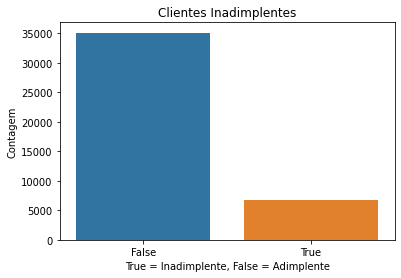

In [ ]:
# Proporção de Inadimplentes no dataframe
fig, ax = plt.subplots()
sns.countplot('target_default', data = df, ax = ax)
ax.set_title('Clientes Inadimplentes')
ax.set_xlabel('True = Inadimplente, False = Adimplente')
ax.set_ylabel('Contagem');

print('Proporção de Inadimplentes no dataframe:')
print(round(df['target_default'].value_counts()*100/df.shape[0]),2)

## **4. Preparação dos Dados**

Considerando as análises feitas na etapa anterior, agora podemos realizar a limpeza e preparação dos dados para a criação do modelo de machine learning.

In [ ]:
# Primeiro vamos fazer uma cópia do dataframe para a manipulação das features
df_limpo = df.copy()

# SUbstituir inf por NaN em reported_income
df_limpo['reported_income'] = df_limpo['reported_income'].replace(np.inf,
                                                                  np.nan)

# Eliminar as colunas sem informações úteis aparentes ou que demandariam pesquisa com peritos da área
drop_col = ['reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel',
            'profile_phone_number', 'shipping_state']
df_limpo.drop(labels=drop_col, axis=1, inplace=True)

# ELiminar as linhas onde target_default é NaN
df_limpo.dropna(subset=['target_default'], inplace = True)

# Substituir o aparente outlier -999 em external_data_provider_email_seen_before por NaN
df_limpo.loc[df_limpo['external_data_provider_email_seen_before'] == -999.0,
             'external_data_provider_email_seen_before'] = np.nan

# Descartar as features ids, target_fraud,
# external_data_provider_credit_checks_last_2_year e channel
df_limpo.drop(labels=['ids', 'target_fraud',
                      'external_data_provider_credit_checks_last_2_year',
                      'channel'], axis=1, inplace=True)


Mesmo que não haja mais informações sobre as features, podemos assumir que a ausência de tantos dados pode ocorrer por dois motivos:

1. Existe a possibilidade da não obrigatoriedade do preenchimento de algumas informações em formulários, como o perfil no Facebook;
2. Não existem informações sobre algumas features, como ['last_amount_borrowed', 'last_borrowed_in_months', 'n_issues'].

Para este segundo caso, os valores NaN serão substituídos por zero. Já para as variáveis numéricas, serão substituídas pela mediana, visto que dependendo da distribuição de valores, a média pode alterar consideravelmente o modelo, e para a categórica será usada a moda, o valor mais frequente.

In [ ]:
# Importação da biblioteca para realizar as substituições
from sklearn.impute import SimpleImputer

num_df = df_limpo.select_dtypes(exclude='object').columns
cat_df = df_limpo.select_dtypes(include='object').columns

# Substituição de valores ausentes
df_limpo.last_amount_borrowed.fillna(value=0, inplace=True)
df_limpo.last_borrowed_in_months.fillna(value=0, inplace=True)
df_limpo.n_issues.fillna(value=0, inplace=True)

# Para as variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_limpo.loc[:,num_df])
df_limpo.loc[:,num_df] = imputer.transform(df_limpo.loc[:,num_df])

# Para as variáveis categóricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_limpo.loc[:,cat_df])
df_limpo.loc[:,cat_df] = imputer.transform(df_limpo.loc[:,cat_df])

Podemos fazer a verificação dos valores nulos, para termos certeza de que o processo acima foi bem sucedido.

In [ ]:
# Verificando os valores nulos
df_limpo.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

Considerando que cada feature geralmente possui uma escala diferente, é interessante fazer a normalização do dados. Para maiores informações, este [artigo](https://medium.com/tentando-ser-um-unic%C3%B3rnio/porqu%C3%AA-e-quando-%C3%A9-necess%C3%A1rio-normalizar-os-dados-92e5cce445aa)  explica em detalhes alguns dos motivos para este processo.

In [ ]:
# Importação da biblioteca de preprocessamento StandardScaler
from sklearn.preprocessing import StandardScaler

# Criando um novo dataframe para a manipulação
scaled_df = df_limpo.copy()

# Normalizar as colunas numéricas
num_cols = scaled_df.drop('target_default',
                         axis=1).select_dtypes(exclude='object').columns

scaled_df[num_cols] = StandardScaler().fit_transform(scaled_df[num_cols].values)

Ainda nesta etapa, iremos utilizar o Label Encoder para codificar em forma de labels as variáveis categóricas.

In [ ]:
# Importação da biblioteca LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Criação de um novo dataframe para manipulação
encoded_df = scaled_df.copy()

# Extrair as colunas categóricas
cat_cols = encoded_df.select_dtypes('object').columns

# Codificar cada coluna categórica
for col in cat_cols:
  encoded_df[col+'_encoded'] = LabelEncoder().fit_transform(encoded_df[col])
  encoded_df.drop(col, axis=1, inplace=True)

Para finalizar a etapa de preprocessamento, vamos separar os dados em teste e treino com a função 'train_test_split'.

In [ ]:
# Importação da função
from sklearn.model_selection import train_test_split

# Separar as variáveis independentes da variável alvo
X = encoded_df.drop('target_default', axis=1).select_dtypes(exclude='object')
y = encoded_df['target_default']

# Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## **5. Criação do modelo de Machine Learning**

De forma arbitrária, vamos utilizar o XGBoost para a criação deste modelo.

In [ ]:
# Importação do classificador 
from xgboost import XGBClassifier

# Importação das bibliotecas de avaliação
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Instanciando o modelo
ml_model = XGBClassifier(learning_rate=0.01, n_estimators=1000,
                         max_depth=4, subsample = 0.9,
                         colsample_bytree = 0.1, gamma=1,
                         random_state=42)

# Treinando o modelo
ml_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=1,
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

É importante ressaltar que não foi feita uma análise aprofundada das features, e nem um tuning dos parâmetros. Isto é o que podemos chamar de um modelo baseline, que realiza uma primeira predição, para futuras melhorias.

Lembrando também que este é um dataset com classes desbalanceadas, que pode não representar bem uma problemática real.

Já para a avaliação deste modelo, vamos utilizar apenas a acurácia como métrica.

In [ ]:
# Fazendo as predições
y_pred = ml_model.predict(X_test)

# Mostrando a acurácia do modelo.
print("\nAccuracy Score:")
print (accuracy_score(y_test, y_pred))


Accuracy Score:
0.8452447496606245


Encontramos uma acurácia de aproximadamente 84,5%.

Dependendo do tipo de projeto, podemos traçar um objetivo do quanto queremos de valor mínimo para acurácia, servindo de comparação entre outros modelos de Machine Learning (ou mesmo um benchmark).

Podemos também assumir que este é um problema de otimização, onde um tuning de parâmetros para diminuir a quantidade de false positives e maximar os true positives pode ser a solução para aumentar a acurácia do modelo.